<a href="https://colab.research.google.com/github/sodiq-sulaimon/Preparations-for-TensorFlow-Developer-Certification/blob/main/IMDB_Subwords8K_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the dataset

In [1]:
# Download the dataset
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKJWCLB/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKJWCLB/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKJWCLB/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


### Prepare the dataset

In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']

# Shuffle the training data
training_data = train_data.shuffle(BATCH_SIZE)

# Batch and pad the datasets
training_data = training_data.padded_batch(BATCH_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

### Build and compile model

In [10]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 128)         66048     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635329 (2.42 MB)
Trainable params: 63532

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [12]:
NUM_EPOCHS = 10

history = model.fit(training_data, epochs=NUM_EPOCHS, validation_data=test_data)

Epoch 1/10
98/98 [==============================] - 55s 495ms/step - loss: 0.5986 - accuracy: 0.6696 - val_loss: 0.4987 - val_accuracy: 0.7747
Epoch 2/10
98/98 [==============================] - 54s 549ms/step - loss: 0.3673 - accuracy: 0.8474 - val_loss: 0.3753 - val_accuracy: 0.8472
Epoch 3/10
98/98 [==============================] - 42s 428ms/step - loss: 0.2779 - accuracy: 0.8934 - val_loss: 0.3988 - val_accuracy: 0.8342
Epoch 4/10
98/98 [==============================] - 51s 525ms/step - loss: 0.2267 - accuracy: 0.9166 - val_loss: 0.4486 - val_accuracy: 0.8499
Epoch 5/10
98/98 [==============================] - 40s 411ms/step - loss: 0.2220 - accuracy: 0.9185 - val_loss: 0.4755 - val_accuracy: 0.8396
Epoch 6/10
98/98 [==============================] - 40s 406ms/step - loss: 0.1771 - accuracy: 0.9374 - val_loss: 0.5433 - val_accuracy: 0.8332
Epoch 7/10
98/98 [==============================] - 40s 411ms/step - loss: 0.1743 - accuracy: 0.9378 - val_loss: 0.5088 - val_accuracy: 0.8360

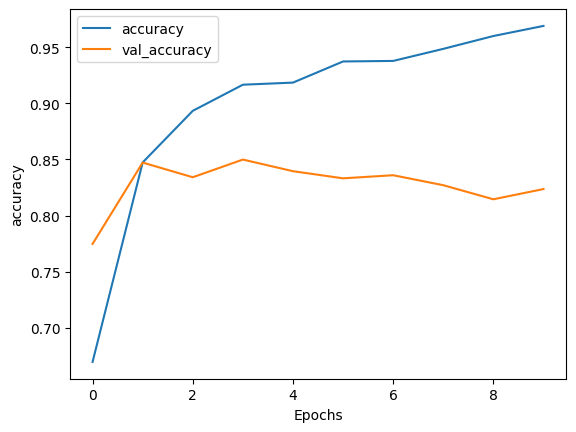

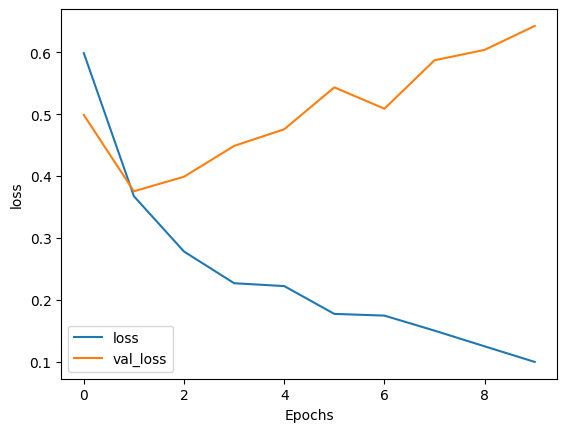

In [13]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")